# MONTE CARLO DROPOUT X APU
Incerteza Epistêmica em Redes Neurais - Gerson Eduardo de Mello 

Esta é uma aplicação do método de incerteza em redes neurais JCGM e MC dropout proposto por Yarin Gal. O Dataset escolhido foi O 
Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise ) retirado do UCL Machine Learn Repository. A variável predita escolhida foi a "Pressure" e todas as demais foram consideradas como variáveis preditoras. 

Este artigo aborda a aplicação da incerteza em aprendizagem profunda denrto do domínio das
ciências físicas. O estudo destaca a importância de avaliar e quantificar as incertezas associadas
a essas previsões, considerando tanto as incertezas epistêmicas relacionadas ao conhecimento do
modelo quanto as incertezas aleatórias provenientes dos dados utilizados. A proposta consiste em
aplicar uma metodologia já consolidada nas ciências físicas, referenciada no JCGM 100:2008, com
adaptações específicas para estimar a incerteza aleatória que é proveniente dos dados, epistêmica
oriunda do modelo e preditiva (relacionadas à previsão) de uma rede neural treinada. O objetivo
principal é desenvolver um algoritmo de fácil aplicação, sem custo computacional que trabalhe
em paralelo com o algoritmo de predição da própria rede neural, permitindo associar a cada valor
predito um intervalo de abrangência de 95% de probabilidade em torno desse valor. Para validar
a eficácia dessa abordagem, realizaremos uma comparação entre a metodologia JCGM 100:2008
e uma abordagem Bayesiana, com foco no método Monte Carlo Dropout, para estimar a incerteza
epistêmica. Utilizaremos um conjunto de dados disponibilizado pelo UC Irvine Machine Learning
Repository como benchmark para avaliar e comparar os resultados obtidos por essas abordagens.A
análise das incertezas provenientes de uma mesma rede neural demonstra que o método JCGM
apresenta-se promissor às condições reais no domínio das ciências físicas. A disponibilidade do código
em  permite a reprodução dos experimentos e facilita o acesso à metodologia proposta.Este estudo contribui para aprimorar o
uso da aprendizagem profunda nas ciências físicas, fornecendo uma compreensão mais completa das
incertezas associadas às previsões, o que é essencial para a confiabilidade e aplicabilidade desses
modelos em diversas áreas de pesquisa

# Manipulando os dados 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [2]:
# importando os dados  

In [3]:
df=pd.read_csv('airfoil.csv')

In [4]:
df

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


Após a avaliação da distribuição dos dados para cada uma das variáveis, pode-se aplicar a normalização que é a mais apropriada do que a padronização uma vez que oas distribuições não seguem uma normalidade

In [5]:
from sklearn.preprocessing import MinMaxScaler 

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
df_n = scaler.fit_transform(df)
print(df_n)

[[0.03030303 0.         1.         1.         0.03900472 0.60682852]
 [0.04040404 0.         1.         1.         0.03900472 0.58023772]
 [0.0530303  0.         1.         1.         0.03900472 0.60018082]
 ...
 [0.19191919 0.7027027  0.27272727 0.19949495 0.90411066 0.08572872]
 [0.24242424 0.7027027  0.27272727 0.19949495 0.90411066 0.07562422]
 [0.30808081 0.7027027  0.27272727 0.19949495 0.90411066 0.02191081]]


In [7]:
df_n=pd.DataFrame(df_n)

In [8]:
y=df_n[5]

In [9]:
X=df_n[df_n.columns[0:5]]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=32)

# Construção e treino da rede neural 

In [11]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [12]:
#construimos a rede neural

In [13]:
n_input = 5  
num_out = 1
p_dropout = 0.5 

lbd = 1e-4  

model = Sequential()
model.add(Dropout(.05, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3) 

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 100)               600       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-traina

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Treino RNN

In [14]:
epochs = 10000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 1,
            epochs=epochs,
            verbose=0)

# Avaliamos a performance do modelo

In [15]:
from sklearn import metrics

y_hat_train = model.predict(X_train)# passamos  o conjunto de treino pela rede e obtemos as predições 


46/46 [==============================] - 0s 598us/step


In [16]:
y_hat_test = model.predict(X_test)# passamos  o conjunto de teste pela rede e obtemos as predições


1/1 [==============================] - 0s 43ms/step


In [17]:
# métricas do treino

In [18]:
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)

In [19]:
MAE_T,R2_T,RMSE_T

(0.053621380866919255, 0.8583312520894791, 0.004803379006749479)

In [20]:
# métricas do teste

In [21]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [22]:
MAE_t,R2_t,RMSE_t

(0.04673048961596084, 0.8493911457431523, 0.0030373228176830674)

# Determinação do erro aleatório e erro sistemático em todo o dataset

In [23]:
previsão=model.predict(X[:1503])# passando todos os dados pela rede (sem distinção de treino e teste)

47/47 [==============================] - 0s 620us/step


In [24]:
previsão=pd.DataFrame(previsão)

In [25]:
df.resume4=pd.concat([X,y,previsão],axis=1) #criando data frame com os valores do vetor x mais a coluna da previsão 

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_7772\1795452580.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume4=pd.concat([X,y,previsão],axis=1) #criando data frame com os valores do vetor x mais a coluna da previsão


In [26]:
df.resume4.columns=['x1','x2','x3','x4','x5','y','predict']

In [27]:

erro=df.resume4['predict']-df.resume4['y']#determinando o erro emtre o real e a predição 

SE=erro.loc[:,].mean()

RE=erro.loc[:,].std()


In [28]:
erro=pd.DataFrame(erro)

In [29]:
RE

0.06712351972595716

In [30]:
SE

0.016259896049322507

In [31]:
erro.describe()# confirmando os resultados

,0
count,1503.000000
mean,0.016260
std,0.067124
min,-0.335698
25%,-0.023586
50%,0.021112
75%,0.055398
max,0.249860


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


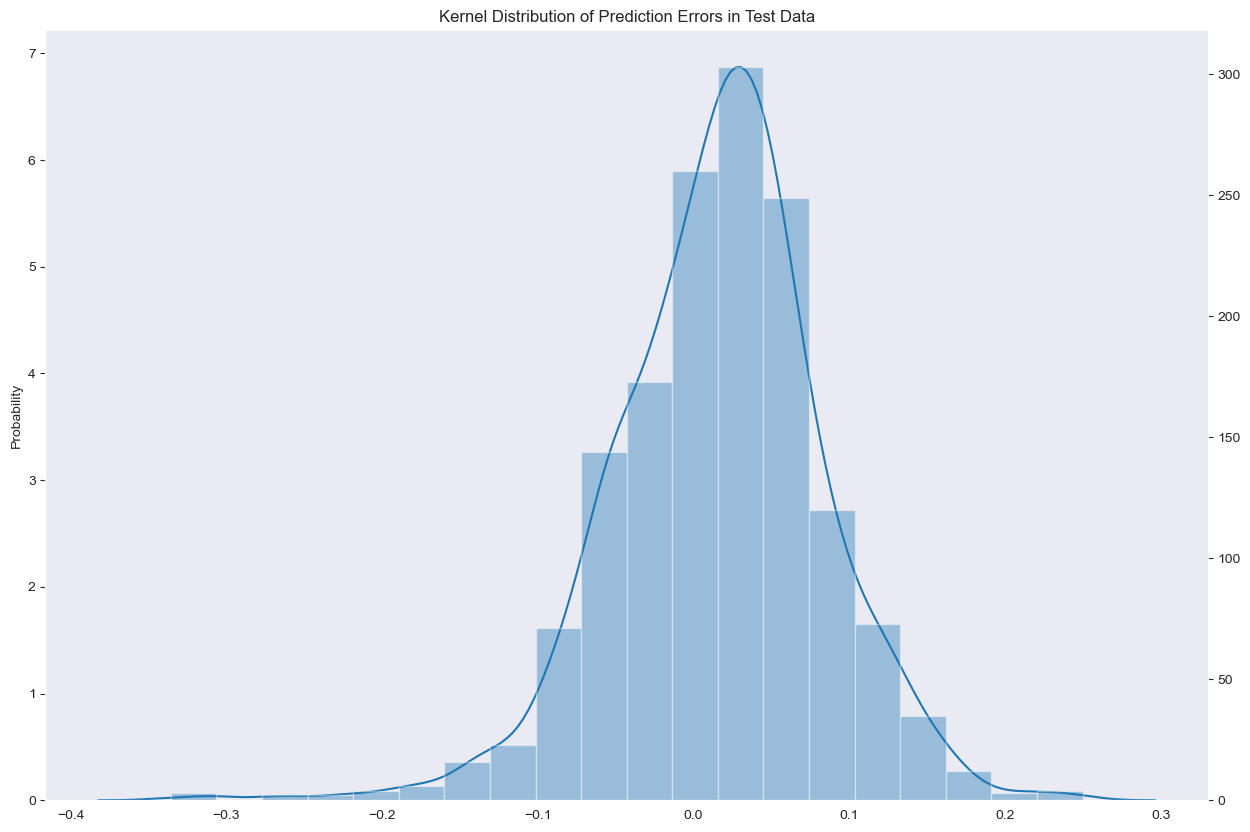

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

bins = 20

# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(erro, ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(erro, ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")

plt.show()


In [33]:
# elaboração do gráfico ordenando os dados em ordem e plotando os valores reais e predito no conjunto de teste 

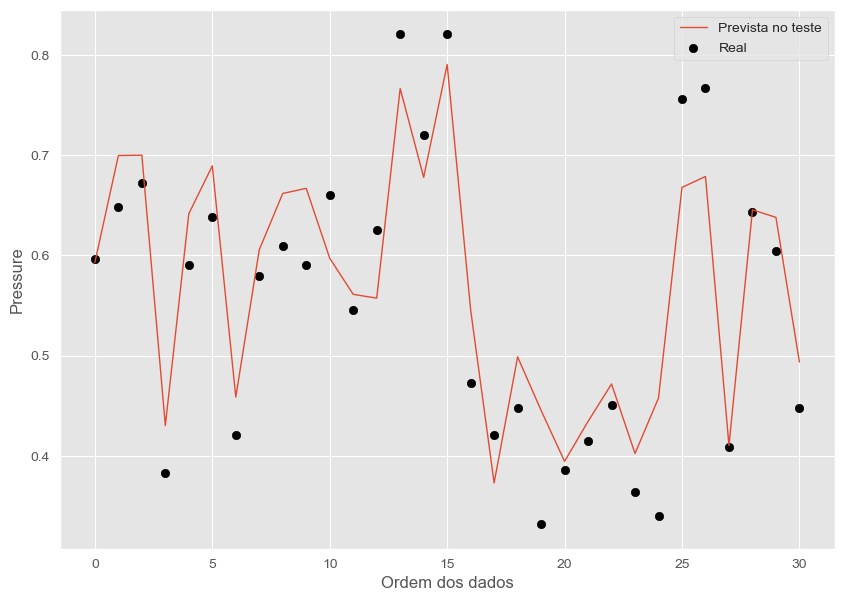

In [34]:
# avaliação conjunto de teste
n = 31
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)#y_hat_test é a prediçã osobre os dados de teste
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase().
Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

# MC DROPOUT

In [35]:
import tensorflow as tf
import numpy as np
from keras import backend as K

T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_test]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_test.shape[0]).T

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [36]:
y_hat_mc.shape

(31, 1000)

In [37]:
y_hat_mc=pd.DataFrame(y_hat_mc)

In [38]:
y_hat_mc # são as 1000 previsões realizadas pela rede Dropout para cada vetor teste

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.661894,0.539418,0.600576,0.639102,0.450163,0.529336,0.665798,0.574050,0.733477,0.555146,...,0.563701,0.599826,0.676117,0.600046,0.615541,0.637679,0.491666,0.645739,0.713141,0.569679
1,0.679610,0.645504,0.645627,0.703436,0.666191,0.675035,0.647048,0.710662,0.661399,0.655492,...,0.643852,0.753071,0.687729,0.671916,0.708800,0.686630,0.712838,0.691337,0.726749,0.651025
2,0.670141,0.709591,0.678335,0.707997,0.716682,0.710407,0.678828,0.715495,0.645970,0.636452,...,0.671798,0.714449,0.616161,0.709719,0.659799,0.596603,0.692337,0.708387,0.663976,0.731911
3,0.457880,0.367968,0.413545,0.448671,0.611981,0.439065,0.405824,0.420460,0.455921,0.402397,...,0.445837,0.505216,0.439556,0.478406,0.388148,0.361295,0.539589,0.531407,0.402802,0.413309
4,0.677903,0.558446,0.635291,0.583170,0.649343,0.588921,0.590882,0.614171,0.641248,0.634893,...,0.592580,0.635636,0.563649,0.676372,0.652967,0.592410,0.621978,0.620159,0.620079,0.531933
5,0.738326,0.636740,0.642263,0.685893,0.678850,0.750394,0.715596,0.633662,0.628559,0.650510,...,0.657518,0.554015,0.791354,0.668695,0.644136,0.638303,0.615125,0.689718,0.687681,0.765236
6,0.562650,0.494211,0.446447,0.739433,0.429090,0.628190,0.590829,0.495972,0.537063,0.404898,...,0.415778,0.423364,0.389740,0.449121,0.478097,0.460697,0.469549,0.458641,0.509251,0.454074
7,0.659932,0.572249,0.519370,0.583852,0.540669,0.638138,0.606571,0.605200,0.648804,0.620838,...,0.575225,0.596266,0.595242,0.642214,0.640325,0.640136,0.581390,0.625354,0.574591,0.640327
8,0.633254,0.683594,0.644297,0.721514,0.679826,0.642841,0.722941,0.626676,0.605454,0.524199,...,0.592039,0.675890,0.655281,0.629891,0.670131,0.632471,0.622508,0.495835,0.697813,0.620772
9,0.590268,0.638577,0.703316,0.684473,0.557131,0.648444,0.628410,0.742430,0.679853,0.616324,...,0.654910,0.639119,0.674363,0.738009,0.656301,0.642677,0.616663,0.689242,0.646719,0.637105


In [39]:
yhat=pd.DataFrame(y_hat_mc)

In [40]:
#vamos calcular a média dos 1000 resultados para cada amostra de teste

In [41]:
yhat['mean']=yhat.apply(np.mean,axis=1)

In [42]:
#separamos novamente os 1000 resultados retitrando a coluna média 

In [43]:
yhatd=yhat.iloc[:,0:1000]

In [44]:
#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste

In [45]:
yhatd['std']=yhatd.apply(np.std,axis=1)

In [46]:
#Abaixo os valores reais para y do conjunto de teste

In [47]:
y_test=pd.DataFrame(y_test)

In [48]:
#resetando o índice 

In [49]:
y_test=y_test.reset_index(drop=True)

In [50]:
#retirado a coluna 0

In [51]:
mean=yhat.iloc[:,1000]

In [52]:
mean=pd.DataFrame(mean)

In [53]:
desvpad=yhatd.iloc[:,1000]

In [54]:
desvpad=pd.DataFrame(desvpad)

# Determinação do erro aleatório e sistemático somente no teste  

In [55]:
#colocar tudo em uma tabela

In [56]:
df.resume=pd.concat([y_test,mean,desvpad],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_7772\1750862409.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume=pd.concat([y_test,mean,desvpad],axis=1)


In [57]:
erro2=df.resume['mean']-df.resume[5]


In [58]:
erro2

0     0.007986
1     0.032023
2     0.023068
3     0.045356
4     0.028755
5     0.027949
6     0.029203
7     0.032745
8     0.026943
9     0.054808
10   -0.086416
11    0.020738
12   -0.061871
13   -0.092718
14   -0.064887
15   -0.054173
16    0.078683
17   -0.027842
18    0.043612
19    0.162303
20    0.004208
21    0.011458
22    0.016600
23    0.047631
24    0.116547
25   -0.117941
26   -0.080997
27   -0.001860
28   -0.000758
29    0.004320
30    0.037791
dtype: float64

In [59]:
es2=erro2.loc[:,].mean()

ea2=erro2.loc[:,].std()


In [60]:
es2

0.008492340683559687

In [140]:
SE

0.016259896049322507

In [62]:
ea2

0.06043779239455682

In [141]:
RE

0.06712351972595716

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


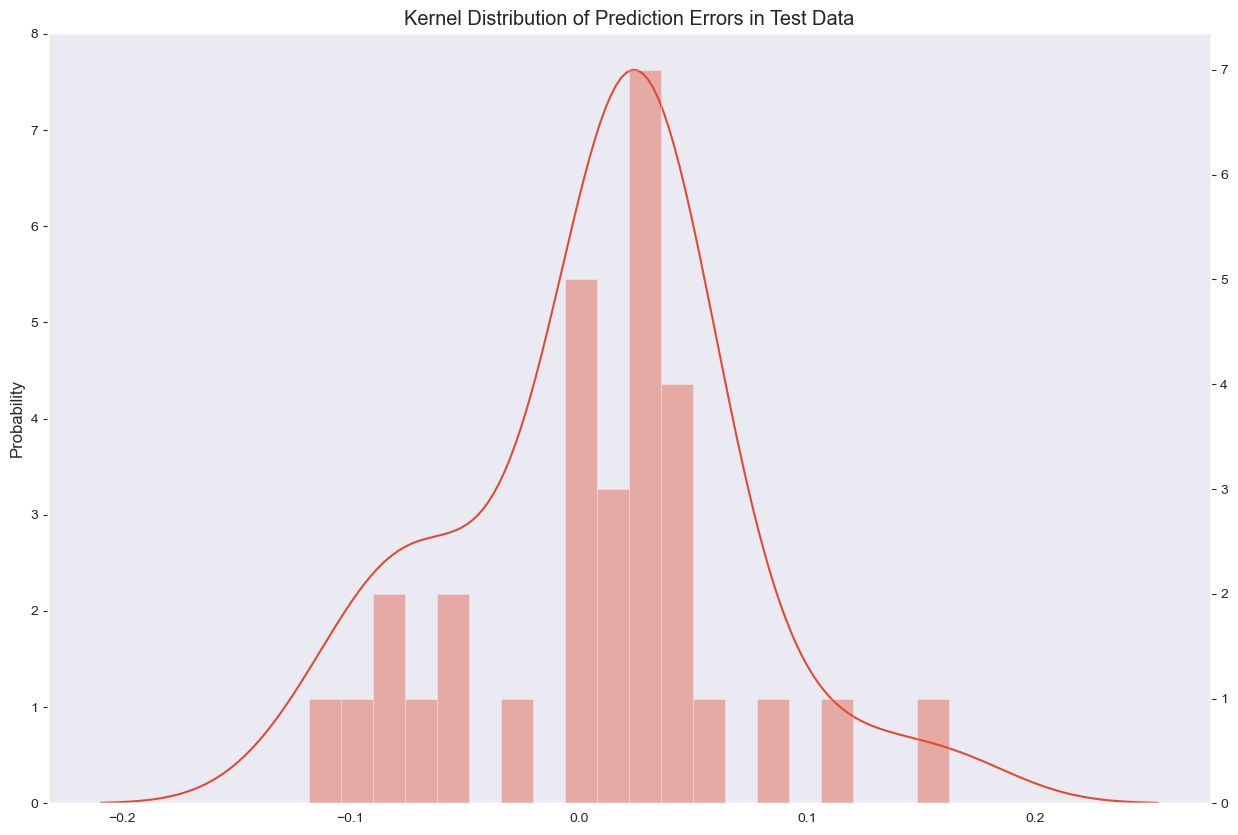

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

bins = 20

# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(erro2, ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(erro2, ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")

plt.show()


# Determinação erro aleatório e sistemático em todos os dados (Dropout) 

In [65]:
import tensorflow as tf
import numpy as np
from keras import backend as K

T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mct = np.array([predict_stochastic([X]) for _ in range(T)])

y_hat_mct = y_hat_mct.reshape(-1, y.shape[0]).T

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [66]:
yhatt=pd.DataFrame(y_hat_mct)

In [67]:
yhatt

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.590008,0.615602,0.660325,0.663346,0.605737,0.672054,0.659668,0.650236,0.533614,0.635538,...,0.648948,0.564004,0.630530,0.605024,0.627141,0.607775,0.621659,0.661546,0.636161,0.686142
1,0.581983,0.585431,0.710920,0.563298,0.695583,0.644596,0.632146,0.619417,0.621733,0.637180,...,0.613986,0.634968,0.656702,0.600641,0.631048,0.610575,0.620251,0.683281,0.592394,0.612277
2,0.608870,0.614125,0.570181,0.627347,0.727041,0.637156,0.653410,0.610574,0.630483,0.622230,...,0.610527,0.610633,0.782997,0.687516,0.681012,0.611669,0.607924,0.619957,0.683286,0.625523
3,0.660346,0.616925,0.659394,0.614371,0.657701,0.655718,0.630807,0.576995,0.656231,0.653614,...,0.567769,0.605141,0.611207,0.613221,0.625289,0.681343,0.597142,0.591512,0.707096,0.665179
4,0.613080,0.665190,0.627362,0.608193,0.641212,0.628840,0.620439,0.649597,0.590445,0.610495,...,0.588423,0.640308,0.710579,0.620805,0.598102,0.612624,0.583858,0.651022,0.650628,0.578838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,0.482895,0.267765,0.247972,0.380093,0.323337,0.243290,0.227381,0.168521,0.179393,0.358865,...,0.346628,0.286909,0.280359,0.307101,0.282027,0.285930,0.270133,0.293165,0.303895,0.222394
1499,0.182371,0.257663,0.180407,0.307007,0.124768,0.281468,0.359665,0.210714,0.091026,0.287454,...,0.144784,0.288210,0.273282,0.370173,0.175073,0.204842,0.255975,0.331547,0.487561,0.185006
1500,0.248391,0.181781,0.201574,0.157302,0.232301,0.185252,0.118129,0.239713,0.223067,0.498939,...,0.195934,0.198246,0.113639,0.254763,0.139398,0.179094,0.144869,0.497234,0.279177,0.183612
1501,0.269072,0.216892,0.088377,0.031525,0.203476,0.355699,0.232034,0.261967,0.033395,0.170664,...,0.075114,0.210204,0.026280,0.079813,0.224209,0.399004,0.092413,0.154087,0.514120,0.228811


In [68]:
meanyhatt=yhatt.apply(np.mean,axis=1)

In [69]:
desvyhatt=yhatt.apply(np.std,axis=1)

In [70]:
erro3=meanyhatt-y

In [71]:
erro3

0       0.028161
1       0.056231
2       0.038435
3      -0.017017
4      -0.024935
          ...   
1498    0.098889
1499    0.093031
1500    0.125168
1501    0.121634
1502    0.148793
Length: 1503, dtype: float64

In [72]:
es3=erro3.loc[:,].mean()

ea3=erro3.loc[:,].std()


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


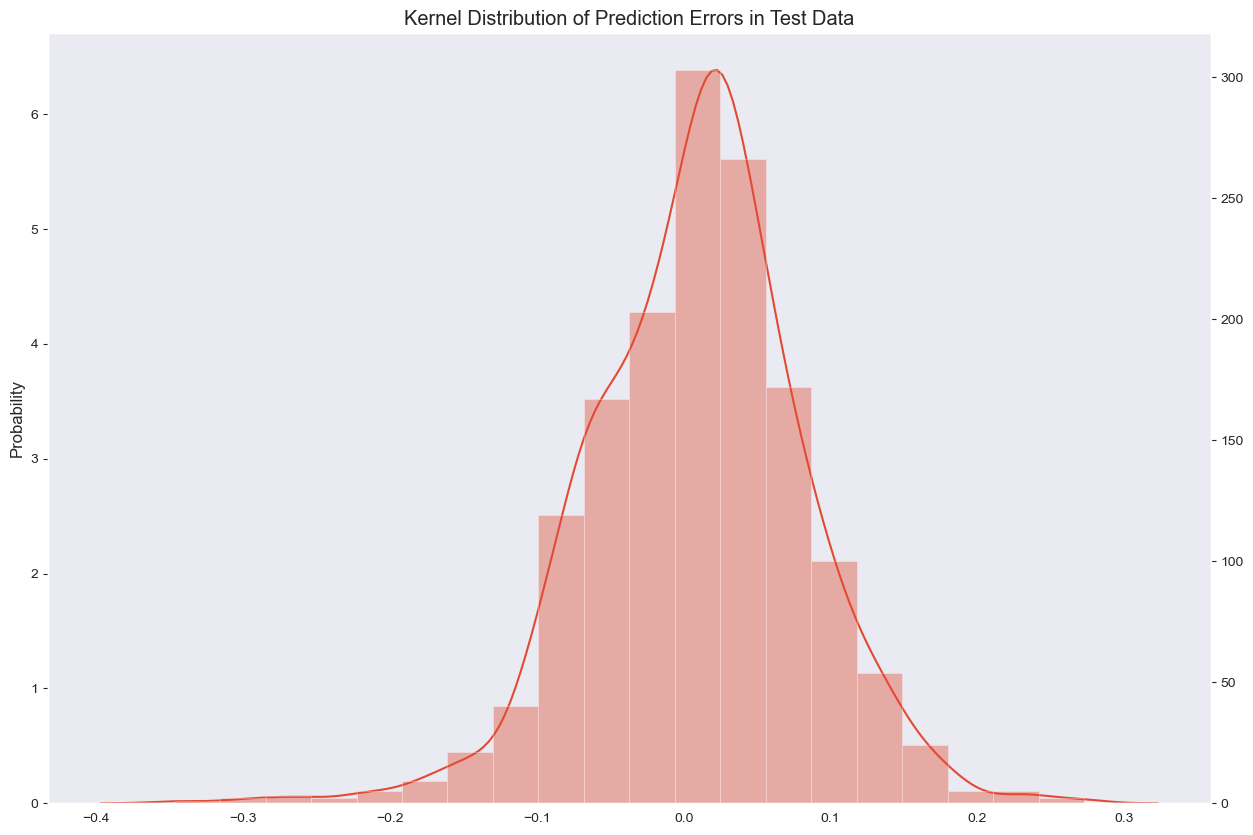

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

bins = 20

# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(erro3, ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(erro3, ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")

plt.show()


In [74]:
#Computamos média e variância para cada ponto no set de teste.

In [75]:
es3

0.009512826417655884

In [76]:
ea3

0.07220151260143408

In [77]:
l = 10
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 

In [78]:
metrics.mean_absolute_error(y_test, y_hat_test_mean)

0.046522142281187326

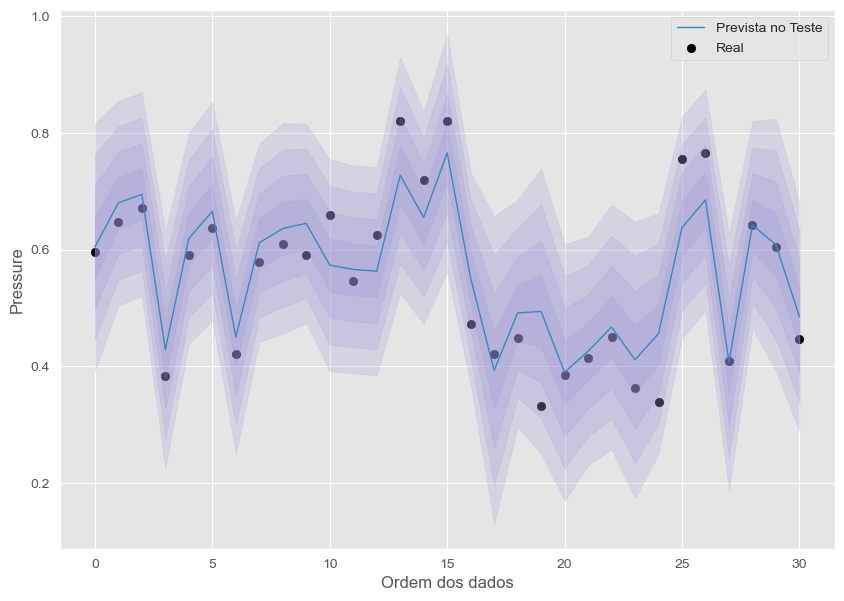

In [79]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

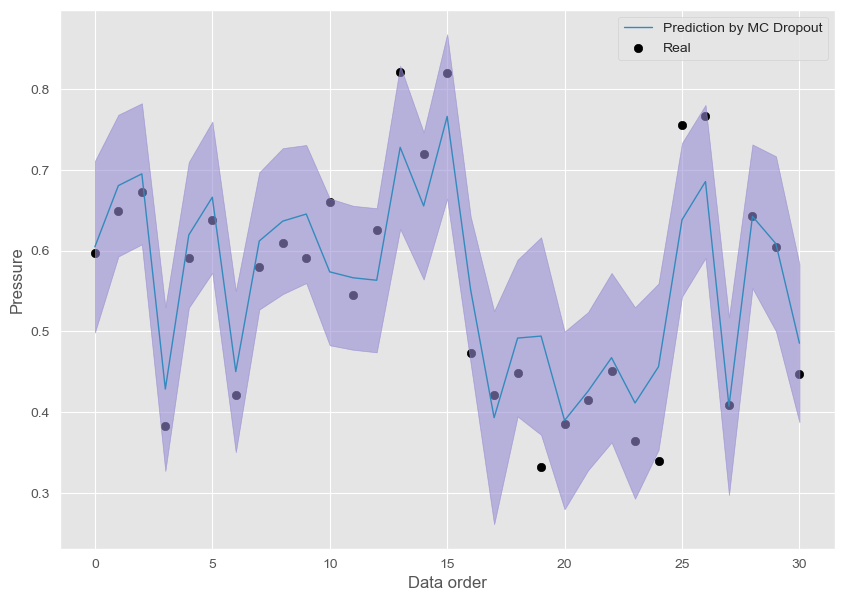

In [80]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prediction by MC Dropout", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma, mu-sigma, alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.svg")
plt.show()

# Determinação das incertezas da rede método APU

In [81]:
X_test=X_test.reset_index(drop=True)

In [82]:
X_test

,0,1,2,3,4
0,0.040404,0.783784,0.000000,1.000000,0.270697
1,0.116162,0.000000,0.454545,0.601010,0.022858
2,0.090909,0.000000,0.454545,1.000000,0.020653
3,0.242424,0.000000,1.000000,0.199495,0.046555
4,0.116162,0.121622,0.454545,0.199495,0.043912
5,0.070707,0.301802,0.272727,0.199495,0.092743
6,0.308081,0.121622,0.454545,0.199495,0.043912
7,0.015152,0.090090,0.727273,0.199495,0.052836
8,0.030303,0.328829,0.727273,0.199495,0.205952
9,0.040404,0.238739,0.727273,0.199495,0.098992


In [83]:

 previsão=model.predict(X_test[:31])


1/1 [==============================] - 0s 19ms/step


In [84]:
colnames=["Predict"]

In [85]:
previsão1=pd.DataFrame(previsão, columns=colnames)

In [86]:
df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_7772\3988421289.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)


In [87]:
#criar a coluna de predict delta x1 

In [88]:
#método numerico para derivadas parcias: método das diferenças onde h=0.000001

In [89]:
h1=0.000001
h2=0.000001
h3=0.000001
h4=0.000001
h5=0.000001

In [90]:
deltax1=X_test[:31]+np.array([h1,0,0,0,0])

In [91]:
previsãodeltax1=model.predict(deltax1[:31])


1/1 [==============================] - 0s 17ms/step


In [92]:
colnames=["Predict Deltax1"]
previsãodeltax1=pd.DataFrame(previsãodeltax1, columns=colnames)

In [93]:
#criar a coluna de predict delta x2

In [94]:
#incerteza de x2 (medidor de ângulo)

In [95]:
deltax2=X_test[:31]+np.array([0,h2,0,0,0])

In [96]:
previsãodeltax2=model.predict(deltax2[:31])

1/1 [==============================] - 0s 17ms/step


In [97]:
colnames=["Predict Deltax2"]
previsãodeltax2=pd.DataFrame(previsãodeltax2, columns=colnames)

In [98]:
#criar a coluna de predict delta x3

In [99]:
#incerteza de x3 (medidor de comprimento)

In [100]:
deltax3=X_test[:31]+np.array([0,0,h3,0,0])

In [101]:
previsãodeltax3=model.predict(deltax3[:31])

1/1 [==============================] - 0s 15ms/step


In [102]:
colnames=["Predict Deltax3"]
previsãodeltax3=pd.DataFrame(previsãodeltax3, columns=colnames)

In [103]:
#criar a coluna de predict delta x4

In [104]:
#incerteza de x4 (medidor de velocidade).

In [105]:
deltax4=X_test[:31]+np.array([0,0,0,h4,0])

In [106]:
previsãodeltax4=model.predict(deltax4[:31])

1/1 [==============================] - 0s 17ms/step


In [107]:
colnames=["Predict Deltax4"]
previsãodeltax4=pd.DataFrame(previsãodeltax4, columns=colnames)

In [108]:
#criar a coluna de predict delta x5

In [109]:
#incerteza de x5 (medidor de sucção)

In [110]:
deltax5=X_test[:31]+np.array([0,0,0,0,h5])

In [111]:
previsãodeltax5=model.predict(deltax5[:31])

1/1 [==============================] - 0s 17ms/step


In [112]:
colnames=["Predict Deltax5"]
previsãodeltax5=pd.DataFrame(previsãodeltax5, columns=colnames)

In [113]:
df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_7772\2651709830.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)


In [114]:
df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/h1


In [115]:
df.total['c2']=(df.total['Predict Deltax2']-df.total['Predict'])/h2


In [116]:
df.total['c3']=(df.total['Predict Deltax3']-df.total['Predict'])/h3

In [117]:
df.total['c4']=(df.total['Predict Deltax4']-df.total['Predict'])/h4

In [118]:
df.total['c5']=(df.total['Predict Deltax5']-df.total['Predict'])/h5

In [119]:
X_test.iloc[0]

0    0.040404
1    0.783784
2    0.000000
3    1.000000
4    0.270697
Name: 0, dtype: float64

In [120]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5
0,0.596591,0.592799,0.592803,0.592798,0.592800,0.592799,0.592799,4.649162,-0.238419,1.192093,0.000000,-0.059605
1,0.648363,0.699482,0.699482,0.699482,0.699482,0.699482,0.699483,-0.119209,0.000000,-0.357628,0.000000,0.178814
2,0.671870,0.699833,0.699834,0.699834,0.699833,0.699833,0.699834,0.298023,0.119209,-0.238419,0.000000,0.596046
3,0.383147,0.430223,0.430222,0.430222,0.430223,0.430223,0.430221,-0.834465,-0.268221,-0.178814,0.119209,-1.251698
4,0.590555,0.641457,0.641456,0.641457,0.641457,0.641457,0.641456,-1.370907,-0.238419,-0.476837,0.059605,-0.953674
5,0.638046,0.689176,0.689172,0.689176,0.689176,0.689176,0.689173,-4.231930,0.476837,-0.119209,0.119209,-2.682209
6,0.420906,0.458545,0.458545,0.458545,0.458545,0.458545,0.458543,-0.804663,-0.298023,-0.178814,0.059605,-2.175570
7,0.579068,0.605549,0.605554,0.605549,0.605549,0.605549,0.605550,4.887581,0.059605,0.000000,0.000000,0.715256
8,0.609434,0.661660,0.661657,0.661660,0.661660,0.661661,0.661660,-3.099442,-0.298023,-0.238419,0.119209,-0.178814
9,0.590342,0.666775,0.666773,0.666775,0.666775,0.666775,0.666775,-1.728535,0.059605,-0.238419,0.059605,-0.178814


In [121]:
#cálculo da incerteza combinada : incerteza expandida de x1 a x5  desvio padrão do erro sistemático
#x1: medidor de frequencia sonora.5% do valor médio da escala
#x2: medidor de angulo :5% do valor médio da escala
#x3: medidor de comprimento 5% do valor médio da escala
#x4: medidor de velocidade do vento Pesquisando a incerteza em tuneis de vento chega a 15% do resultado . Como a velocidade média é em torno de 40 m/s estimou-se em +-6m/s²
#x5: medidor de sucção 5% do valor médio da escala
#y: pressão somora: 5% do valor médio da escala
 

In [122]:
upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2

In [123]:
df_n.rename(columns={
    0: 'Frequency',1:'Angle',2:'Length',3:'Velocity',4:'Suction Side',5:'Pressure'
   
},inplace=True)

In [124]:
correlation= df_n.corr()


In [125]:
r_12=correlation['Frequency']['Angle']

In [126]:
r_13=correlation['Frequency']['Length']

In [127]:
r_14=correlation['Frequency']['Velocity']

In [128]:
r_15=correlation['Frequency']['Suction Side']

In [129]:
r_23=correlation['Angle']['Length']

In [130]:
r_24=correlation['Angle']['Velocity']

In [131]:
r_25=correlation['Angle']['Suction Side']

In [132]:
r_34=correlation['Length']['Suction Side']

In [133]:
r_35=correlation['Length']['Velocity']

In [134]:
r_45=correlation['Velocity']['Suction Side']

<AxesSubplot:>

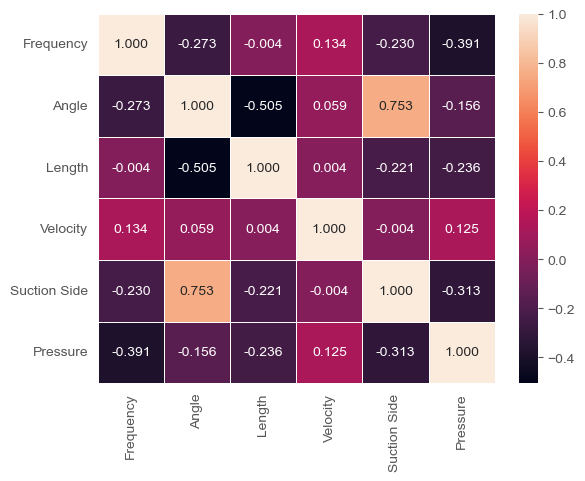

In [135]:
plot = sns.heatmap(correlation, annot = True, fmt=".3f", linewidths=.6)

plot

In [136]:
cov= df_n.cov()

In [137]:
cov

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
Frequency,0.025351,-0.011578,-0.000195,0.008369,-0.008305,-0.011412
Angle,-0.011578,0.071066,-0.045059,0.006160,0.045528,-0.007634
Length,-0.000195,-0.045059,0.112085,0.000499,-0.016760,-0.014504
Velocity,0.008369,0.006160,0.000499,0.154647,-0.000354,0.009025
Suction Side,-0.008305,0.045528,-0.016760,-0.000354,0.051387,-0.013002
Pressure,-0.011412,-0.007634,-0.014504,0.009025,-0.013002,0.033651


# Determinação da incerteza aleátória ( ucca) , epistêmica ( ucce) e preditiva (ucc)

In [138]:
ucca=((df.total['c1']*upx1)**2+
      (df.total['c2']*upx2)**2+
      (df.total['c3']*upx3)**2+
      (df.total['c4']*upx4)**2+
      (df.total['c5']*upx5)**2+
      2*df.total['c1']*df.total['c2']*upx1*upx2*r_12+
      2*df.total['c1']*df.total['c3']*upx1*upx3*r_13+
      2*df.total['c1']*df.total['c4']*upx1*upx4*r_14+
      2*df.total['c1']*df.total['c5']*upx1*upx5*r_15+
      2*df.total['c2']*df.total['c3']*upx2*upx3*r_23+
      2*df.total['c2']*df.total['c4']*upx2*upx4*r_24+
      2*df.total['c2']*df.total['c5']*upx2*upx5*r_25+
      2*df.total['c3']*df.total['c4']*upx3*upx4*r_34+
      2*df.total['c3']*df.total['c5']*upx3*upx5*r_35+
      2*df.total['c4']*df.total['c5']*upx4*upx5*r_45
                  +upy**2)**0.5

In [142]:
ucce=((RE)**2)**0.5

In [144]:
ucc=(ucca**2+ucce**2)**0.5

In [145]:
U= 2*ucc+abs(SE)

In [146]:
df.total['ucca']=ucca
df.total['ucce']=ucce
df.total['ucc']=ucc
df.total['U']=U

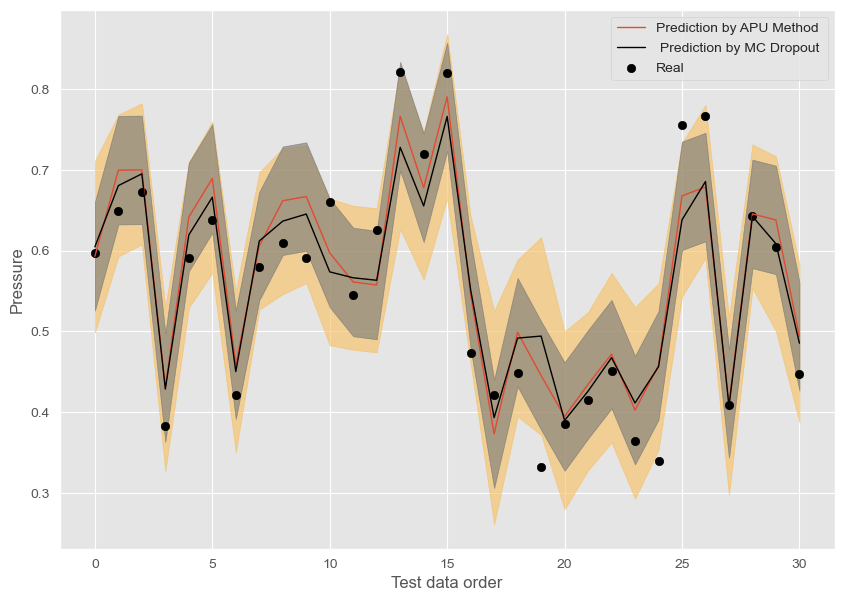

In [147]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, df.total['Predict'], label="Prediction by APU Method ", color="C7", lw=1)
plt.plot(t, mu, label=" Prediction by MC Dropout", color="Black", lw=1)
for shade in range(1, 5):
    plt.fill_between(t, mu+sigma, mu-sigma , alpha=0.2, color="C11")
for shade in range(1, 5):
    plt.fill_between(t, df.total['Predict']-df.total['ucce'], df.total['Predict']+df.total['ucce'], alpha=0.2, color="C3")

plt.scatter(t, df.total[5], color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Test data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test4.pdf",format='pdf')
plt.show()

In [148]:
MCCC=pd.concat([df.total[5],df.total['Predict'],df.total['ucca'],df.total['ucce'],df.total['ucc'],df.total['U']],axis=1)

In [149]:
# Definir os nomes das colunas
nomes_colunas = ['Real','GUM Predict','GUM Aleatoric Uncertainty','GUM Epistemic Uncertainty','GUM Preditive Uncertainty','GUM_U_exp']

# Atribuir os nomes das colunas ao DataFrame
MCCC.columns = nomes_colunas



In [150]:
MCCC

,Real,GUM Predict,GUM Aleatoric Uncertainty,GUM Epistemic Uncertainty,GUM Preditive Uncertainty,GUM_U_exp
0,0.596591,0.592799,0.002788,0.067124,0.067181,0.150623
1,0.648363,0.699482,0.004901,0.067124,0.067302,0.150864
2,0.671870,0.699833,0.015138,0.067124,0.068809,0.153879
3,0.383147,0.430223,0.031594,0.067124,0.074187,0.164634
4,0.590555,0.641457,0.024121,0.067124,0.071326,0.158912
5,0.638046,0.689176,0.066570,0.067124,0.094537,0.205333
6,0.420906,0.458545,0.054686,0.067124,0.086580,0.189420
7,0.579068,0.605549,0.017955,0.067124,0.069483,0.155227
8,0.609434,0.661660,0.005131,0.067124,0.067319,0.150899
9,0.590342,0.666775,0.004831,0.067124,0.067297,0.150854


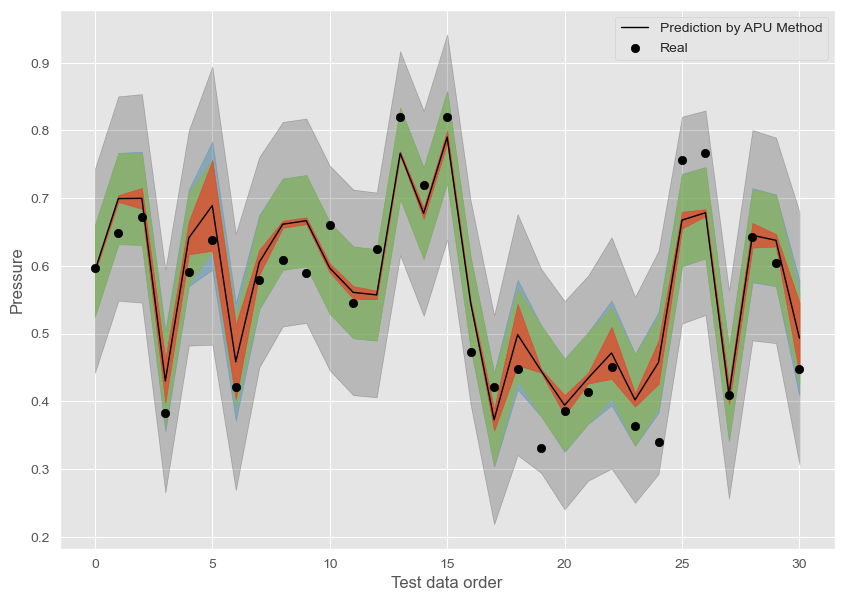

In [171]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, MCCC['GUM Predict'], label='Prediction by APU Method', color="Black", lw=1)

for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM_U_exp'],  MCCC['GUM Predict']+MCCC['GUM_U_exp'], alpha=0.05,color="black")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM Preditive Uncertainty'],  MCCC['GUM Predict']+MCCC['GUM Preditive Uncertainty'], alpha=0.1, color="C8")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM Epistemic Uncertainty'],  MCCC['GUM Predict']+MCCC['GUM Epistemic Uncertainty'], alpha=0.2, color="C5")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM Aleatoric Uncertainty'],  MCCC['GUM Predict']+MCCC['GUM Aleatoric Uncertainty'], alpha=0.3, color="C7")

plt.scatter(t, MCCC['Real'], color="black", label="Real")

plt.ylabel("Pressure")
plt.xlabel("Test data order")

plt.legend(loc="best")

f.savefig("rnn_demanda_test3.svg",format='pdf')

# Determinação da Incerteza para um dado "vi" qualquer 

In [ ]:
upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2

In [ ]:
#matriz das incertezas 
I = [
    [upx1**2, upx1*upx2,upx1*upx3,upx1*upx4,upx1*upx5],[0, upx2**2,upx2*upx3,upx2*upx4,upx2*upx5],
    [0, 0,upx3**2,upx3*upx4,upx3*upx5], [0, 0,0,upx4**2,upx4*upx5],
   [0, 0,0,0,upx5**2]]
Id=pd.DataFrame(I)
print(Id)

In [ ]:
#matriz dos coeficientes de correlação 
correlation= df_n.corr()
matriz =correlation.values
print(matriz)

In [ ]:
# Matriz das covariâncias 
A = I
B = matriz

# Criando uma nova matriz C multiplicando os elementos correspondentes de A e B
C = []

for i in range(len(A)):
    new_row = []
    for j in range(len(A[0])):
        new_row.append(A[i][j] * B[i][j])
    C.append(new_row)

# Imprimindo a matriz resultante C
for row in C:
    print(row)
    
    
    

In [ ]:
#matriz das derivadas parciais 
#definindo um vi 
x1=0.040404
x2= 0.783784
x3=0.000000
x4=1.000000
x5=0.270697
data = { 'x1': [x1],'x2': [x2],'x3': [x3],'x4': [x4],'x5': [x5]
}
# Criando um DataFrame a partir do dicionário
vi=pd.DataFrame(data)
# dado um vi pertencente ao domínio X
h=0.000001
yi=model.predict(vi)
c1=(model.predict(vi+np.array([h,0,0,0,0]))-model.predict(vi))/h
c2=(model.predict(vi+np.array([0,h,0,0,0]))-model.predict(vi))/h
c3=(model.predict(vi+np.array([0,0,h,0,0]))-model.predict(vi))/h
c4=(model.predict(vi+np.array([0,0,0,h,0]))-model.predict(vi))/h
c5=(model.predict(vi+np.array([0,0,0,0,h]))-model.predict(vi))/h

#matriz dos coef.de sensibilidade 
CS = [
    [c1**2, 2*c1*c2,2*c1*c3,2*c1*c4,2*c1*c5],[0, c2**2,2*c2*c3,2*c2*c4,2*c2*c5],
    [0, 0,c3**2,2*c3*c4,2*c3*c5], [0, 0,0,c4**2,2*c4*c5],
   [0, 0,0,0,c5**2]]

# Matriz das contribuições para incerteza 
A = C
B = CS

# Criando uma nova matriz C multiplicando os elementos correspondentes de A e B
MC = []

for i in range(len(A)):
    new_row = []
    for j in range(len(A[0])):
        new_row.append(A[i][j] * B[i][j])
    MC.append(new_row)
    
# Inicializando a variável de soma
soma_total = 0

# Percorrendo a matriz e somando os elementos
for linha in MC:
    for elemento in linha:
        soma_total += elemento

ucca_vi=(soma_total)**0.5
ucce_vi=((ea)**2)**0.5
ucc_vi=(ucca_vi**2+ucce_vi**2)**0.5
Up_vi= 2*ucc_vi+abs(es)
Up_vi